In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from sklearn.model_selection import train_test_split

In [2]:
optdigits_df=pd.read_csv('optdigits_csv.csv')

In [3]:
def test_train_splitter(optdigits_df):
    X,Y = train_test_split(optdigits_df,test_size=0.20, random_state=1)
    X_without_label = X.iloc[:,0:64].values
    X_with_label = X.iloc[:,:].values
    Y_data = Y.iloc[:,0:64].values
    Y_label = Y.iloc[:,64].values
    return X_with_label,X_without_label,Y_data,Y_label

In [4]:
def centroid_initialization(X_with_label,X_without_label):    
    i = 0
    Centroids=np.array([]).reshape(64,0)
    while(i<10):
        rand=rd.randint(0,m-1)
        if(X_with_label[rand,64] == i):
            Centroids=np.c_[Centroids,X_without_label[rand]]
            i = i + 1
    return Centroids

In [5]:
def kmeans_algorithm(X_with_label,X_without_label,Centroids):
    num_iter=100
    Output={}
    for n in range(100):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X_without_label-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)   
        Z={}
        for k in range(K):
            Z[k]=np.array([]).reshape(64,0)
            Output[k]=np.array([]).reshape(65,0)
        for i in range(m):
            Z[C[i]]=np.c_[Z[C[i]],X_without_label[i]]
            Output[C[i]]=np.c_[Output[C[i]],X_with_label[i]]     
        for k in range(K):
            Z[k]=Z[k].T
        for k in range(K):
            Centroids[:,k]=np.mean(Z[k],axis=0)
        return Output

In [6]:
def print_number_in_all_cluster(Output):
    for i  in range(0,10):
        print("cluster "+str(i))
        print(Output[i][64,:])

In [7]:
def visualize_50_digits_in_cluster(Output):
    for j in range(0,10):
        plt.figure(figsize=(30,10))
        print('Cluster ' + str(j))
        numOfRows = 50
        print(str(Output[j].shape[1]) + " elements")
        for i in range(0,50):
            plt.subplot(5+1,10,i+1)
            image = Output[j][0:64,i]
            image = image.reshape(8,8)
            plt.imshow(image,cmap='gray')
            plt.axis('off')
        plt.show()

In [8]:
def measuring_accuracy(Centroids,Y_data,Y_label):
    number_of_test_data = Y_data.shape[0]
    EuclidianDistance=np.array([]).reshape(number_of_test_data,0)
    for k in range(K):
        tempDist=np.sum((Y_data-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    predicted_value=np.argmin(EuclidianDistance,axis=1)
    number_of_correct_prediction = 0
    for i in range(0,predicted_value.shape[0]):
        if(predicted_value[i] == Y_label[i]):
            number_of_correct_prediction = number_of_correct_prediction + 1
    accuracy = number_of_correct_prediction/number_of_test_data * 100
    print('Accurcy in test Dataset:')
    print(accuracy)

In [9]:
X_with_label,X_without_label,Y_data,Y_label = test_train_splitter(optdigits_df)
m = X_without_label.shape[0]
K=10
Centroids = centroid_initialization(X_with_label,X_without_label)
Output = kmeans_algorithm(X_with_label,X_without_label,Centroids)

Cluster 0
488 elements


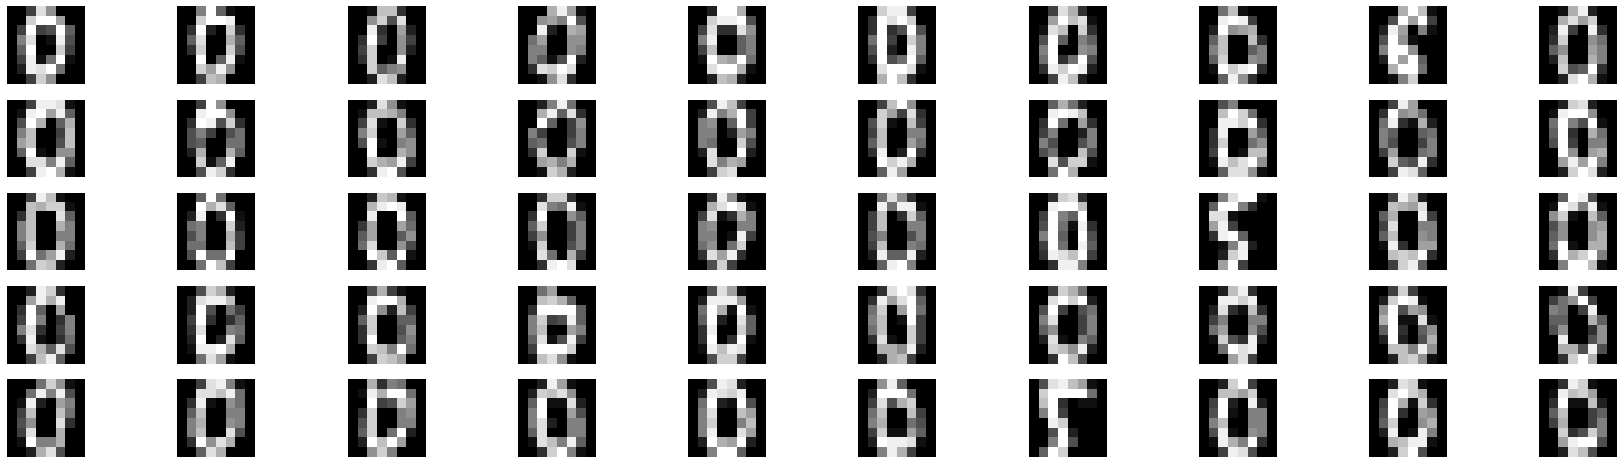

Cluster 1
549 elements


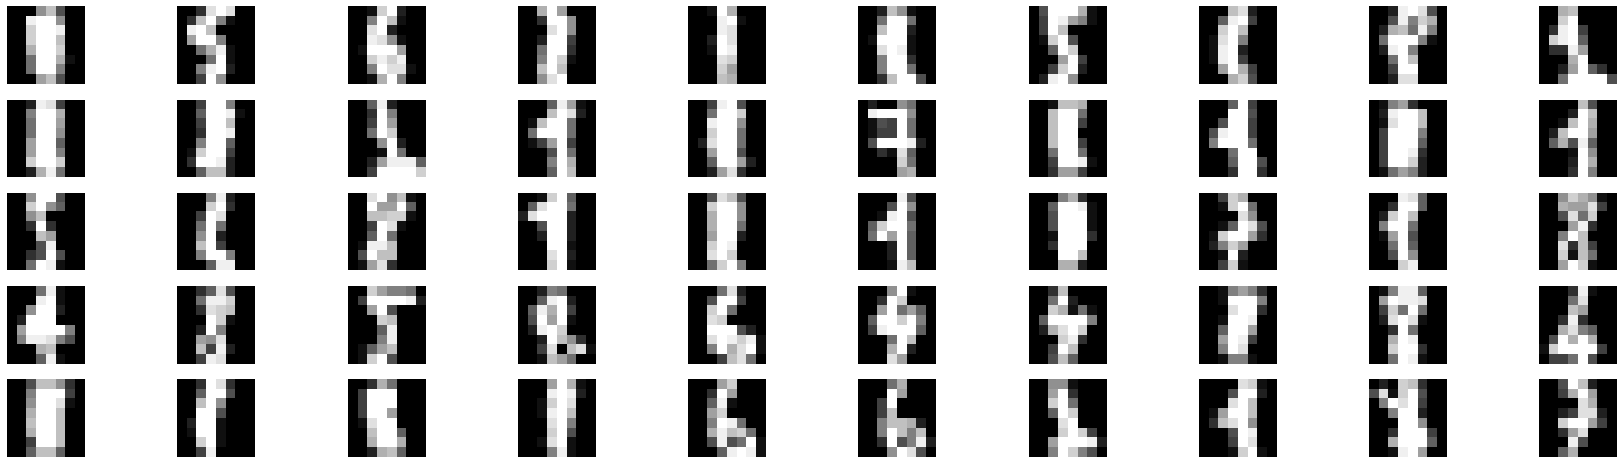

Cluster 2
537 elements


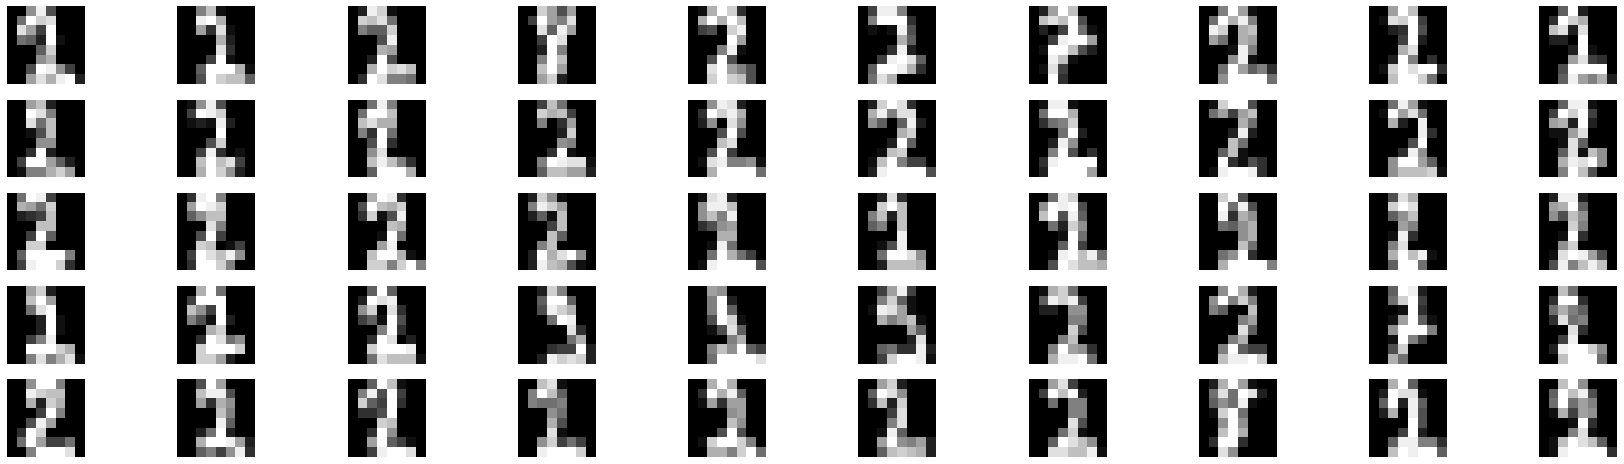

Cluster 3
362 elements


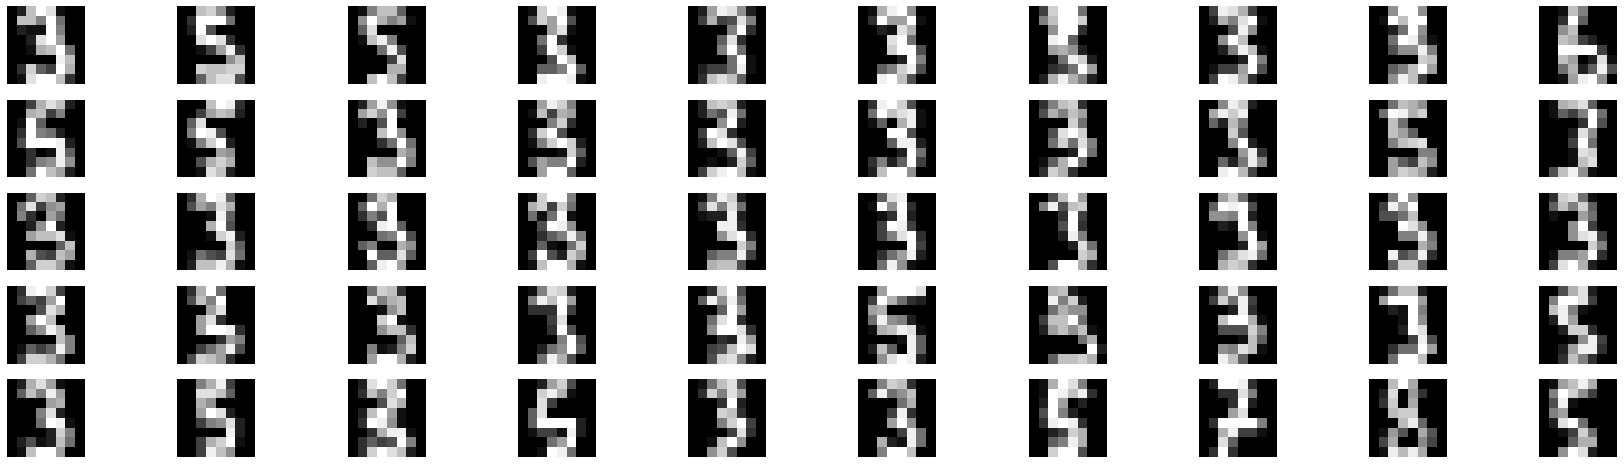

Cluster 4
504 elements


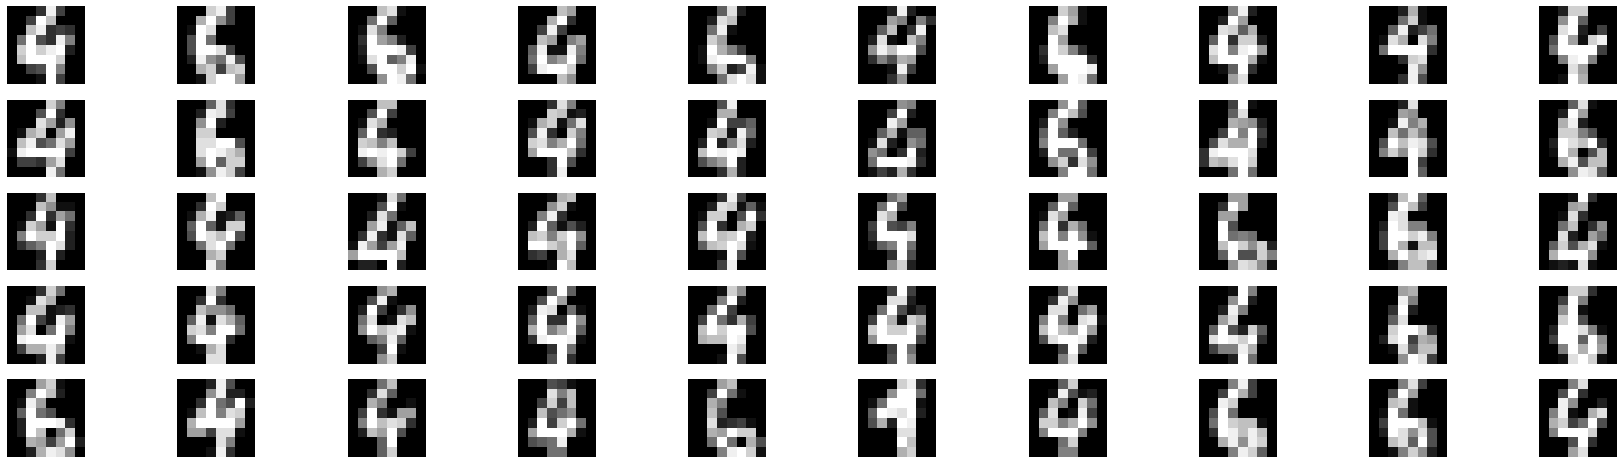

Cluster 5
283 elements


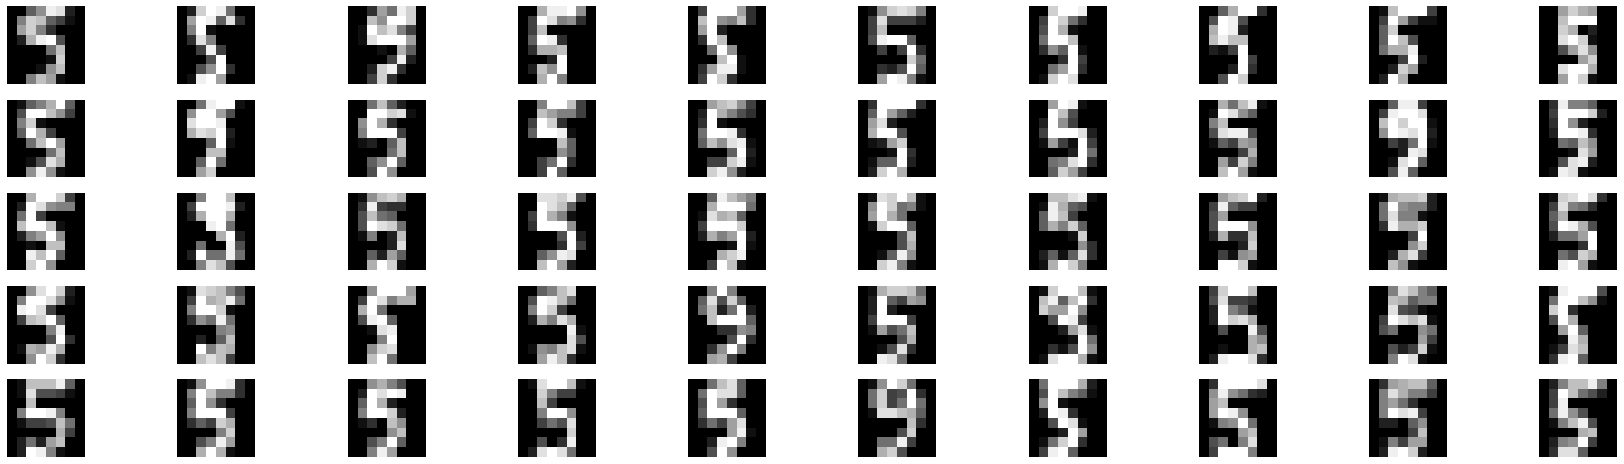

Cluster 6
210 elements


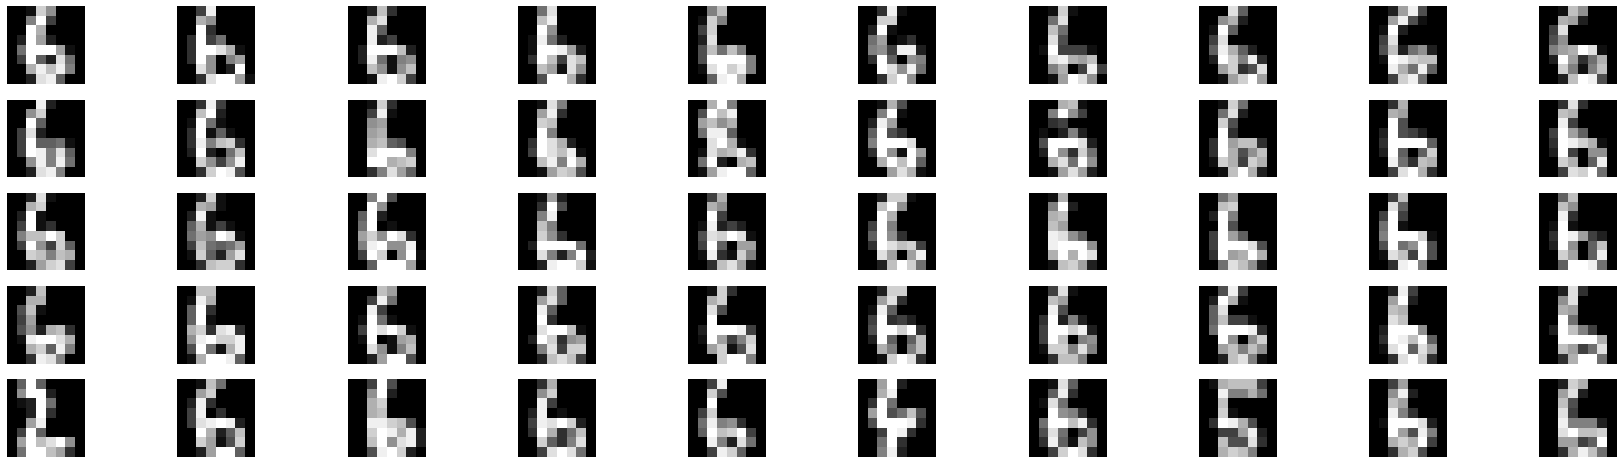

Cluster 7
610 elements


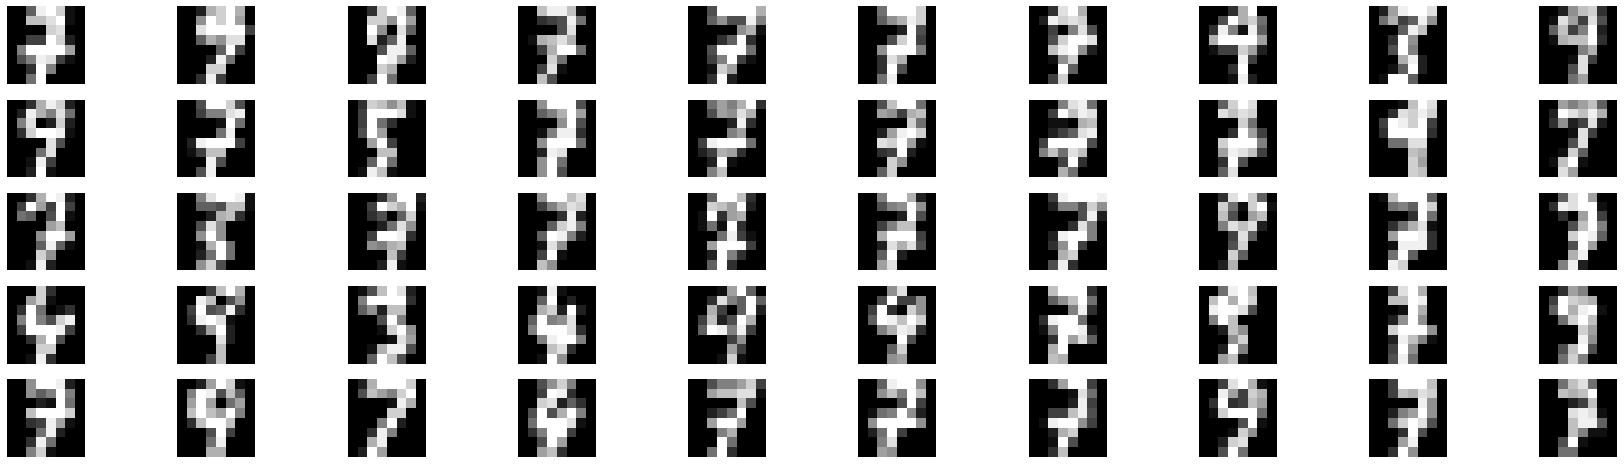

Cluster 8
760 elements


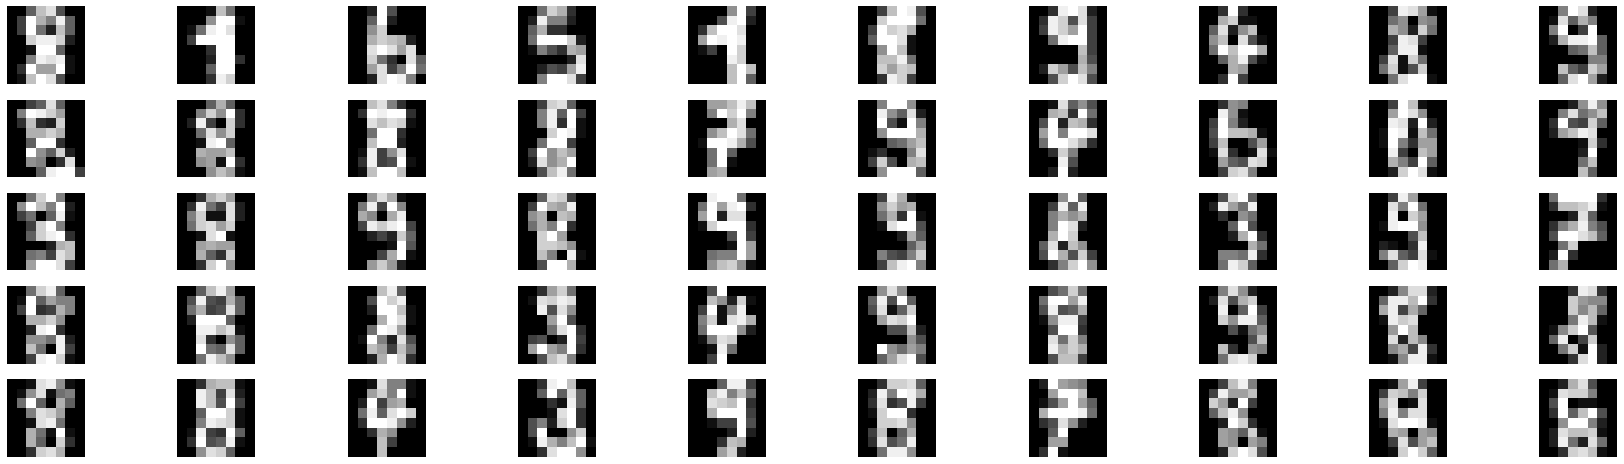

Cluster 9
193 elements


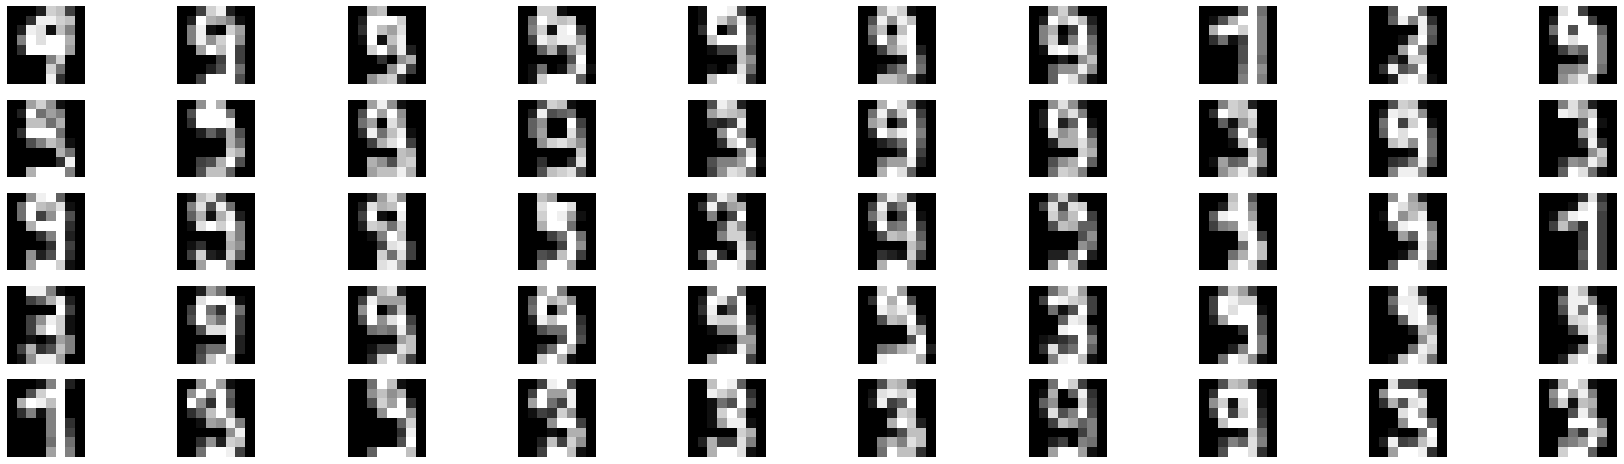

In [10]:
visualize_50_digits_in_cluster(Output)

In [11]:
print_number_in_all_cluster(Output)

cluster 0
[0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0.
 0. 0. 5. 2. 0. 0. 0. 0. 0. 5. 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 5. 0. 0. 0. 0. 0. 8. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 5. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 5. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 5. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 5. 5. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 5. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 5. 5. 0. 0. 6. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 5. 0. 0

In [12]:
measuring_accuracy(Centroids,Y_data,Y_label)

Accurcy in test Dataset:
79.27046263345196
